# Example

Below I give a simple example to get you started with Pandas.

In [1]:
# import convention for pandas
import pandas as pd

# read in your data
df = pd.read_csv('/../../wifi-prepped-data.csv')

# execute the cell you're in by pressing Shift + Enter

In [2]:
# show first 5 rows of the DataFrame
df.head()

,sourceMac,typeNr,subTypeNr,seqNr,retryFlag,measurementTimestamp,droneId,signal
0,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407778,Oscar,-57
1,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407779,Hotel,-68
2,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407784,Papa,-60
3,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,268,0,1423136407788,Oscar,-59
4,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407788,November,-68


In [3]:
# a very useful pandas facility, to group a DataFrame using one (or more) index values as keys
groups = df.groupby(by=['droneId'])

# the 'groups' variable is just another object
# it produces a sequence of group names together with a chunk of data (the group) 
# we can iterate over it, and do something with it

for keys, group in groups:
    # print the group name, and the length of the group
    print(keys, len(group))

Alpha 48
Hotel 43
India 26
Kilo 18
Lima 22
Mike 16
November 62
Oscar 23
Papa 13
Quebec 16
Romeo 24


In [8]:
%matplotlib inline

import numpy as np
from scipy.constants import c
from scipy.constants import pi
from scipy.optimize import minimize
from scipy.stats import chi2
from matplotlib import pyplot as plt

f = 2.4e9
np.random.seed(100)

Functions

In [12]:
def get_transmission_power(Pt, r): 
    Pr = Pt + 20 * np.log10(c / (4 * pi * f * r)) 
    return Pr

def get_transmission_power_coords(Pt, router_pos, wifi_pos):
    r = ((router_pos[0] - wifi_pos[0]) ** 2 + (router_pos[1] - wifi_pos[1]) ** 2 + (router_pos[2] - wifi_pos[2]) ** 2) ** 0.5 
    return get_transmission_power(Pt, r)


def get_distance(Pt, Pr):
    r = c / (10 ** ((Pr - Pt) / 20.0) * 4 * pi * f)
    return r

a)

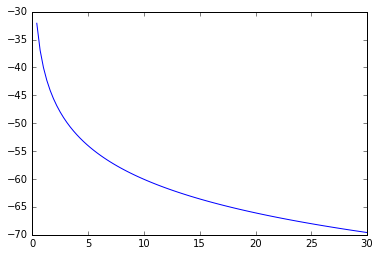

In [13]:
rs = np.linspace(0.4, 30, 100)
plt.plot(rs, get_transmission_power(0, rs))
plt.show()

b)

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

$ r = \frac{c}{4\pi f} 10^{-\frac{P_r - P_t}{20}} $

c)

In [24]:
print("Distance between -30 and -31 dBm is %f m" % (get_distance(0, -31) - get_distance(0, -30)))
print("Distance between -60 and -61 dBm is %f m" % (get_distance(0, -61) - get_distance(0, -60)))


Distance between -30 and -31 dBm is 0.038355 m
Distance between -60 and -61 dBm is 1.212900 m


d) This is because the signal strength from a point source decays as $r^{-2}$.

e)

<img src="exampleA.png">